# Uber Rider Data Case Study

BitTiger DS501

##  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

![Uber](./images/uber.jpg)

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/churn.csv')

In [3]:
# Browse dataset
df.head(10)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  surge_pct  \
0      3.67                   5.0                   4.7       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   5.0                   4.3       1.00        0.0   
3      2.36                   4.9                   4.6       1.14       20.0   
4      3.13                   4.9                   4.4       1.19       11.8   
5     10.56                   5.0                   3.5       1.00        0.0   
6      3.95                   4.0                   4.9       1.00        0.0   
7      2.04                   5.0                   5.0       1.00        0.0   
8      4.36                   5.0                   4.5       1.00        0.0   
9      2.37                   5.0                   4.9       1.00        0.0   

   trips_in_first_30_days  luxury_car_user  weekday_pct  city_Astapor  \
0                       4                1         46.2           0.0   
1                       0                0         50.0           1.0   
2                       3                0        100.0           1.0   
3                       9                1         80.0           0.0   
4                      14                0         82.4           0.0   
5                       2                1        100.0           0.0   
6                       1                0        100.0           1.0   
7                       2                0        100.0           0.0   
8                       2                0        100.0           0.0   
9                       1                0          0.0           0.0   

   city_King's Landing  city_Winterfell  phone_Android  phone_iPhone  \
0                  1.0              0.0            0.0           1.0   
1                  0.0              0.0            1.0           0.0   
2                  0.0              0.0            0.0           1.0   
3                  1.0              0.0            0.0           1.0   
4                  0.0              1.0            1.0           0.0   
5                  0.0              1.0            0.0           1.0   
6                  0.0              0.0            1.0           0.0   
7                  0.0              1.0            0.0           1.0   
8                  0.0              1.0            1.0           0.0   
9                  0.0              1.0            1.0           0.0   

   phone_no_phone  churn  
0             0.0      0  
1             0.0      1  
2             0.0      1  
3             0.0      0  
4             0.0      1  
5             0.0      0  
6             0.0      1  
7             0.0      1  
8             0.0      1  
9             0.0      1

In [4]:
# Show summary stats
df.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          50000.000000          50000.000000  50000.000000   
mean       5.796827              4.779050              4.650038      1.074764   
std        5.707357              0.445974              0.575601      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.500000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days  luxury_car_user   weekday_pct  \
count  50000.000000            50000.000000      50000.00000  50000.000000   
mean       8.849536                2.278200          0.37708     60.926084   
std       19.958811                3.792684          0.48466     37.081503   
min        0.000000                0.000000          0.00000      0.000000   
25%        0.000000                0.000000          0.00000     33.300000   
50%        0.000000                1.000000          0.00000     66.700000   
75%        8.600000                3.000000          1.00000    100.000000   
max      100.000000              125.000000          1.00000    100.000000   

       city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
count  50000.000000         50000.000000     50000.000000   50000.000000   
mean       0.330680             0.202600         0.466720       0.300440   
std        0.470463             0.401941         0.498896       0.458454   
min        0.000000             0.000000         0.000000       0.000000   
25%        0.000000             0.000000         0.000000       0.000000   
50%        0.000000             0.000000         0.000000       0.000000   
75%        1.000000             0.000000         1.000000       1.000000   
max        1.000000             1.000000         1.000000       1.000000   

       phone_iPhone  phone_no_phone         churn  
count  50000.000000    50000.000000  50000.000000  
mean       0.691640        0.007920      0.623920  
std        0.461821        0.088642      0.484405  
min        0.000000        0.000000      0.000000  
25%        0.000000        0.000000      0.000000  
50%        1.000000        0.000000      1.000000  
75%        1.000000        0.000000      1.000000  
max        1.000000        1.000000      1.000000

## Build Logistic Regression Model

### Define Features and Target

In [5]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [6]:
X = df[selected_features].values
y = df['churn'].values

In [7]:
X.shape

(50000, 14)

In [8]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Let's Train-test split the data!

In [9]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model using sklearn

In [10]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [11]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [12]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


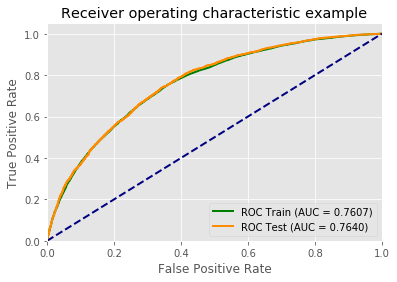

In [14]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [15]:
# Logistic Tunning
C_ori = 0.01
auc_logistic = []
while(C_ori <= 2):
    clf = LogisticRegression(C=1.0, penalty='l2')

    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    auc_logistic.append(roc_auc_score(y_test, p_test_pred))
    
    C_ori += 0.01

print("The maximum AUC is: ", max(auc_logistic))
print("The maximum auc value for logistic regression is with C value equals to: ", auc_logistic.index(max(auc_logistic))*0.01+0.01)

The maximum AUC is:  0.764022797696727
The maximum auc value for logistic regression is with C value equals to:  0.01


### Understanding the Estimated Coefficients

In [16]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

feature     coeff
8             city_Astapor  0.659806
11           phone_Android  0.443715
3                avg_surge  0.198335
1     avg_rating_by_driver  0.145792
10         city_Winterfell  0.135279
2     avg_rating_of_driver  0.132317
0                 avg_dist  0.035349
7              weekday_pct  0.000191
4                surge_pct -0.004126
13          phone_no_phone -0.049709
5   trips_in_first_30_days -0.117622
12            phone_iPhone -0.652255
6          luxury_car_user -0.864915
9      city_King's Landing -1.053334

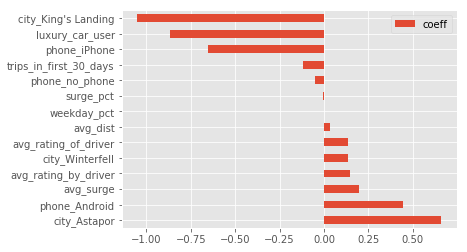

In [17]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.914341  0.810461
Accuracy   0.829650  0.757600
Precision  0.853748  0.798285
Recall     0.877090  0.819229
f1-score   0.865261  0.808622


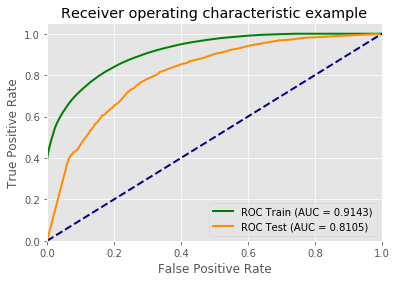

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [19]:
max_depth_dt = 1
min_samples_leaf_dt = 1
auc_dt = []
while(max_depth_dt <= 40):
    while(min_samples_leaf_dt <= 20):
        clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

        # Fit a model by providing X and y from training set
        clf.fit(X_train, y_train)

        # Make prediction on the training data
        y_train_pred = clf.predict(X_train)
        p_train_pred = clf.predict_proba(X_train)[:,1]

        # Make predictions on test data
        y_test_pred = clf.predict(X_test)
        
        auc_dt.append(roc_auc_score(y_test, p_test_pred))
        
        min_samples_leaf_dt += 1
        
    max_depth_dt += 1

print("The maximum AUC is: ", max(auc_dt))

The maximum AUC is:  0.8104607770625465


In [17]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.918858  0.853330
Accuracy   0.835075  0.782700
Precision  0.845043  0.801716
Recall     0.900702  0.866741
f1-score   0.871985  0.832962


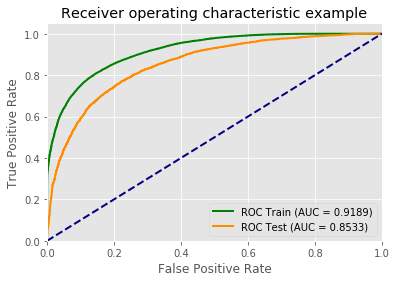

In [21]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [22]:
# We use the default settings for the base model
# Iterate the number of estimators
n_estimators_bagging = 1
auc_bagging = []
while (n_estimators_bagging <= 100):
    base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

    # Choose some parameter combinations to try
    parameters = {
                  'base_estimator':base_classifier,
                  'n_estimators': n_estimators_bagging,
                  'n_jobs': -1
                  }

    clf = BaggingClassifier(**parameters)

    # Train test model
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    auc_bagging.append(roc_auc_score(y_test, p_test_pred))
    
    n_estimators_bagging += 1

print("The maximum AUC value for bagging tree is: ", max(auc_bagging))

KeyboardInterrupt: 

#### Single KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':10,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 20,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier


# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
             # 'max_features': 'auto',
             # 'criterion': 'gini',
             # 'max_depth': 20,
             # 'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
# Tunning process
for i in range(200):
    # Choose some parameter combinations to try
    parameters = {'n_estimators': 37,
             # 'max_features': 'auto',
             # 'criterion': 'gini',
             # 'max_depth': 20,
             # 'min_samples_split': 2,
              'min_samples_leaf': 14,
              'random_state': 1,
              'n_jobs': -1
              }
    clf = RandomForestClassifier(**parameters)

    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)
    print("i+1", i+1)
    # Train test model
    train_test_model(clf, X_train, y_train, X_test, y_test)


### Gradient Boosting Trees

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier


for i in range(200):
    # Choose some parameter combinations to try
    parameters = {
        'n_estimators': 37,
        'max_depth': 6,
        'learning_rate': 0.2,
        'random_state': 42
    }

    # parameters = {
    #     'n_estimators': 50,
    #     'max_depth': 5,
    #     'learning_rate': 0.2,
    #     'subsample': 0.7,
    #     'max_features':0.8,
    #     'random_state': 42
    # }

    print("i+1 ", i+1)
    
    clf = GradientBoostingClassifier(**parameters)

    # Train test model
    train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


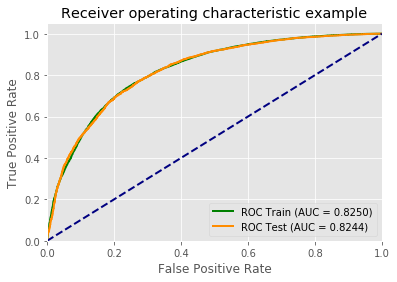

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


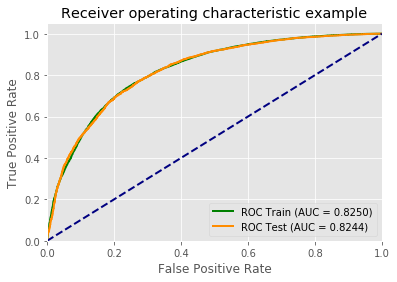

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              train      test
metrics                      
AUC        0.794921  0.791468
Accuracy   0.735275  0.731000
Precision  0.742845  0.739798
Recall     0.880216  0.878739
f1-score   0.805717  0.803305


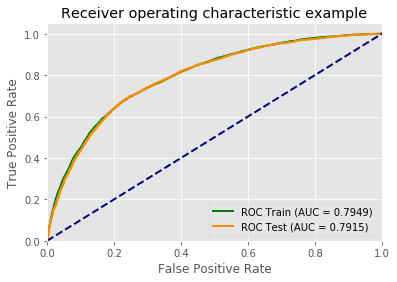

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


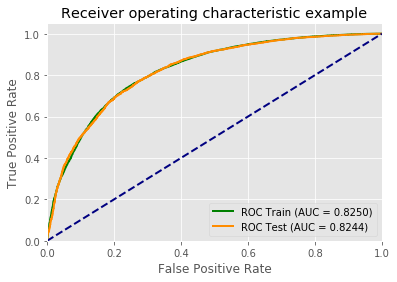

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


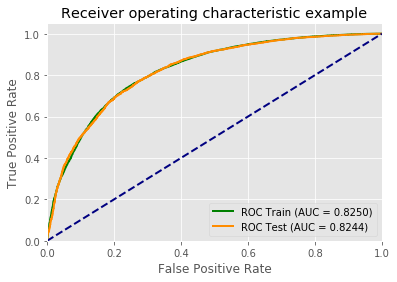

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


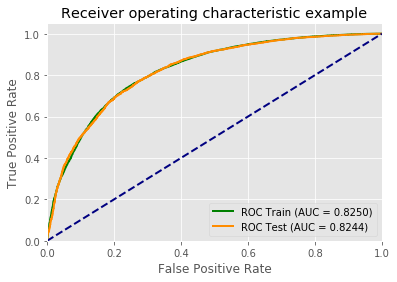

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


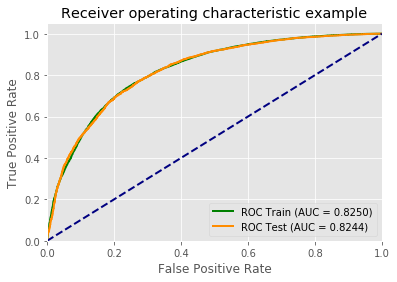

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


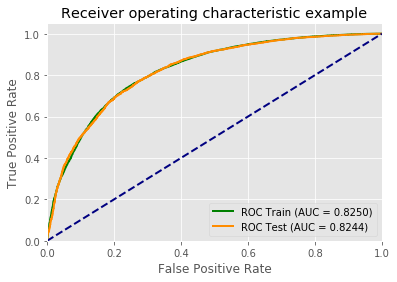

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


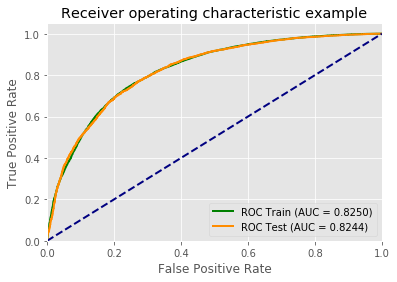

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


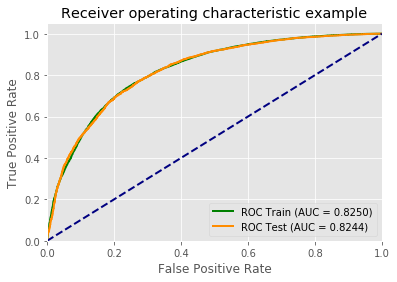

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


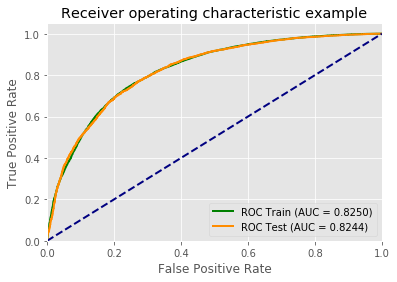

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


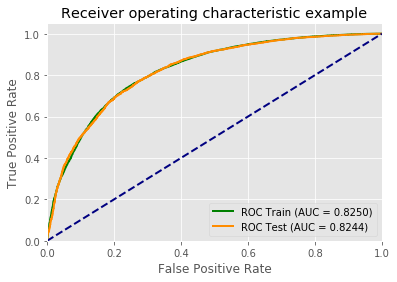

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


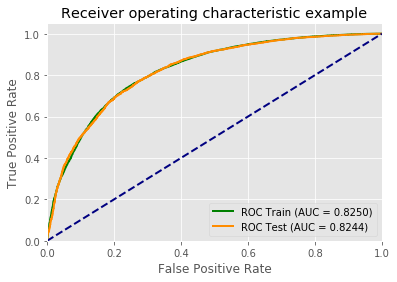

              train      test
metrics                      
AUC        0.820552  0.818841
Accuracy   0.759275  0.760400
Precision  0.761258  0.761002
Recall     0.894528  0.899056
f1-score   0.822530  0.824289


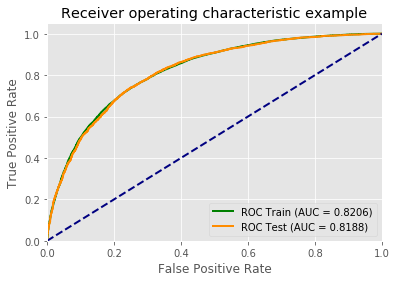

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


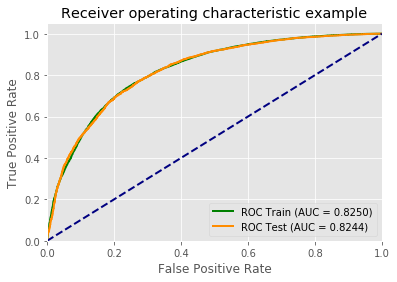

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


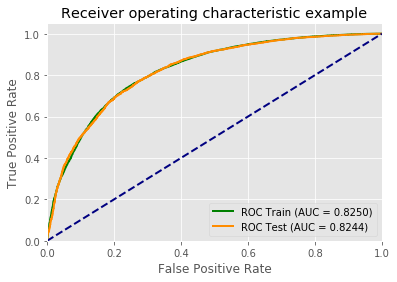

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


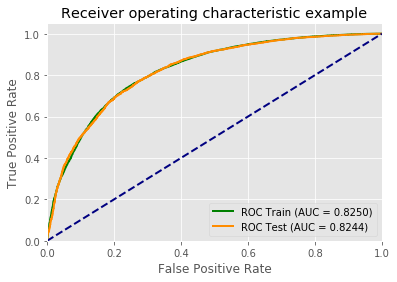

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


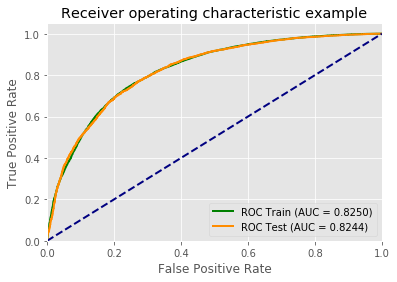

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


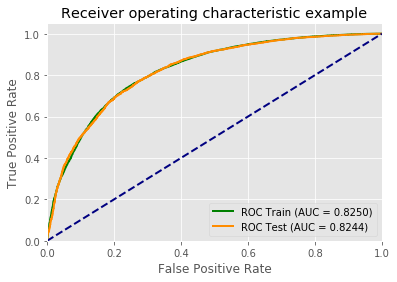

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


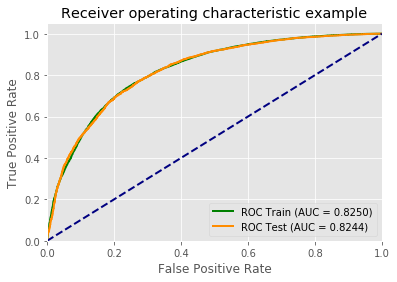

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


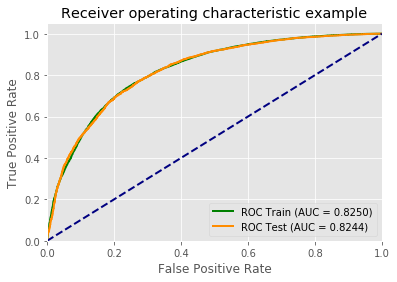

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


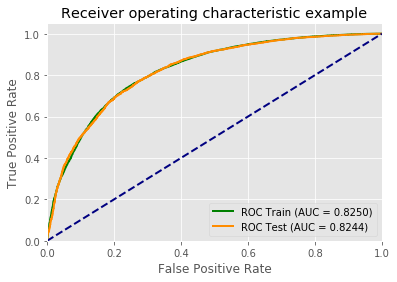

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


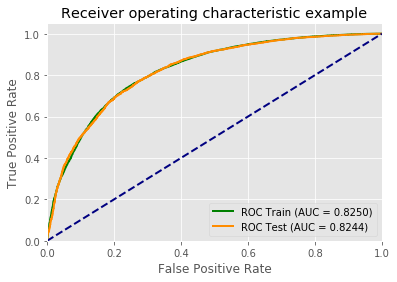

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


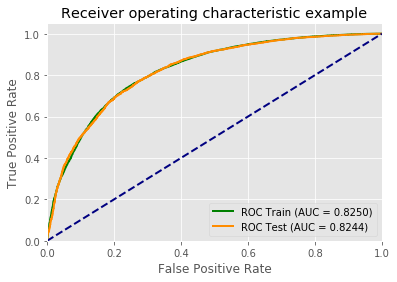

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


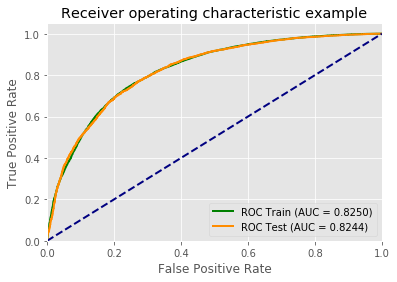

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


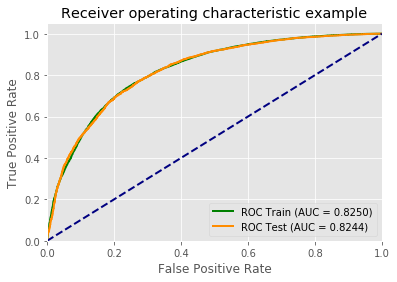

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


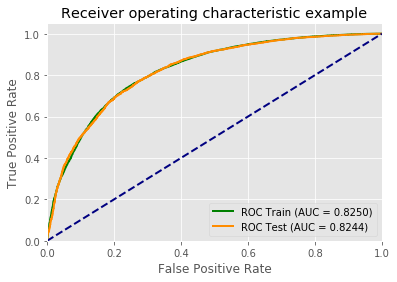

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


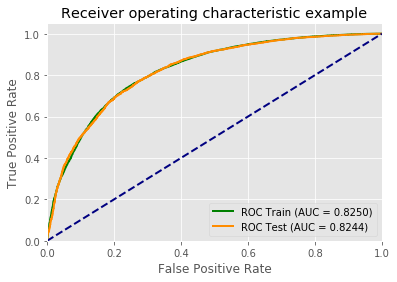

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


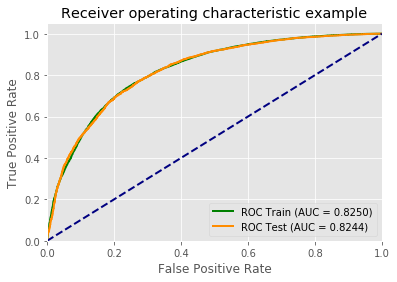

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


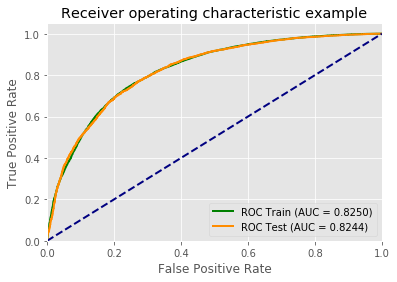

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


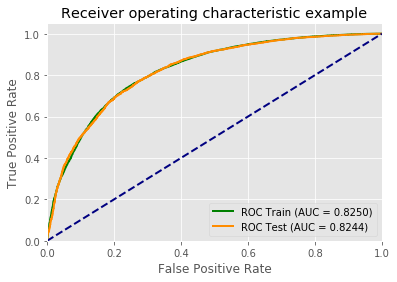

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


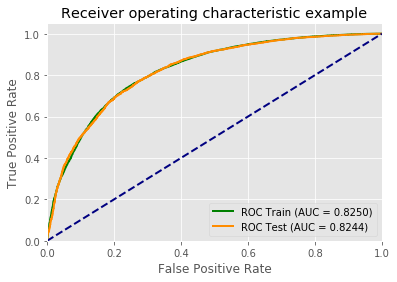

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


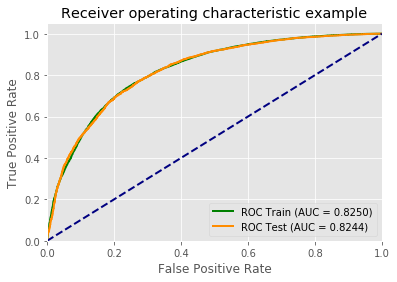

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


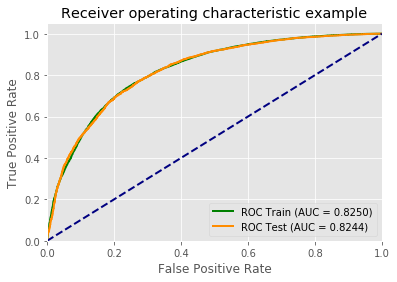

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


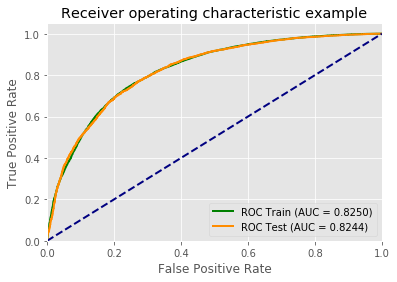

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


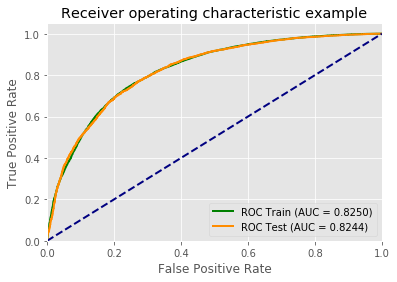

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


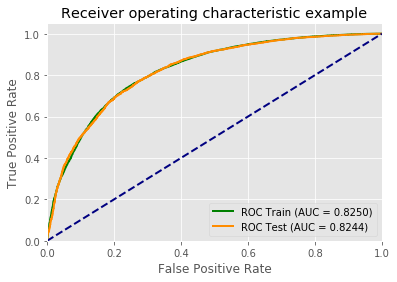

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


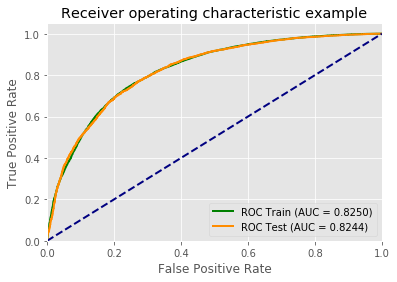

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


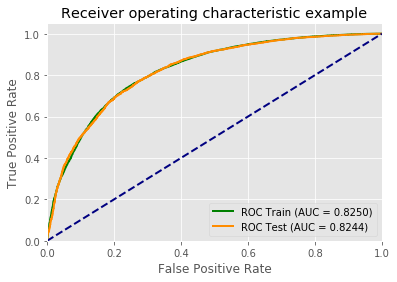

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


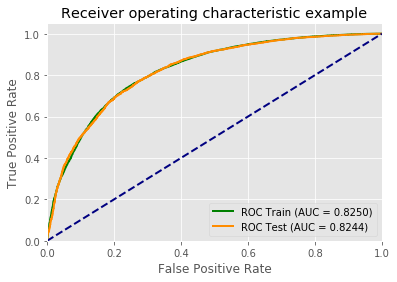

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


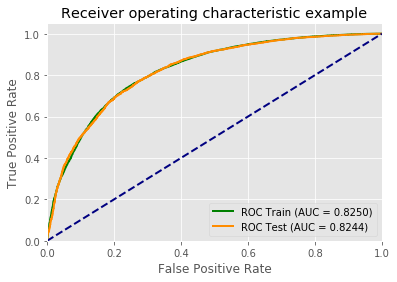

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


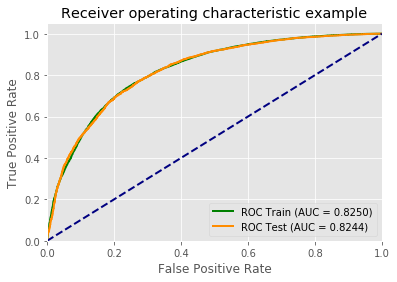

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


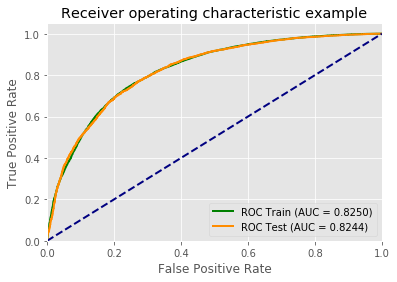

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


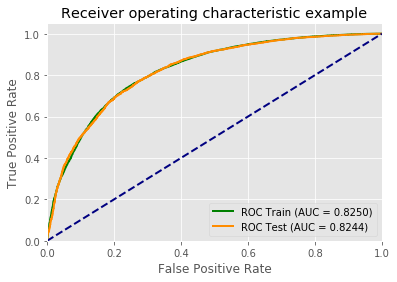

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


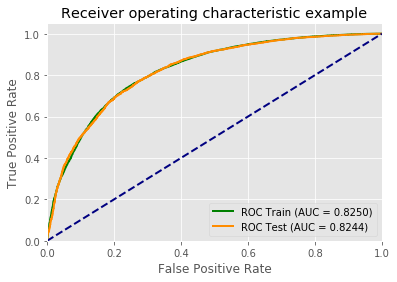

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


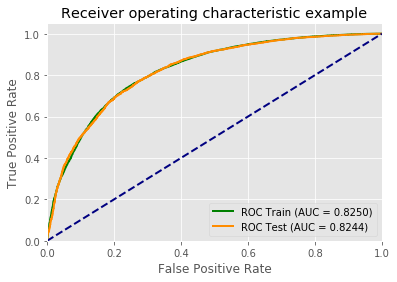

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


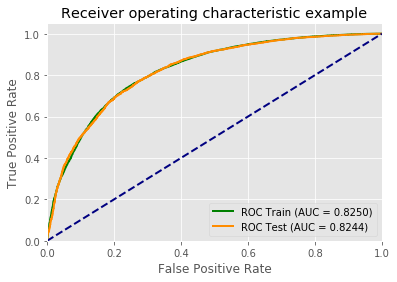

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


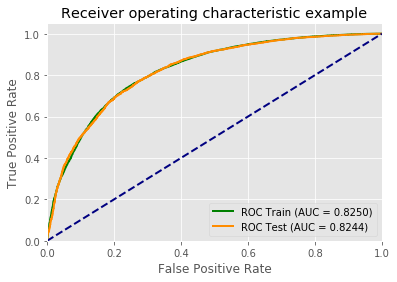

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


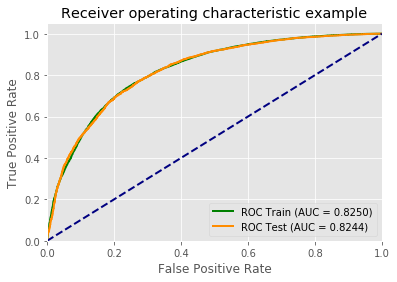

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


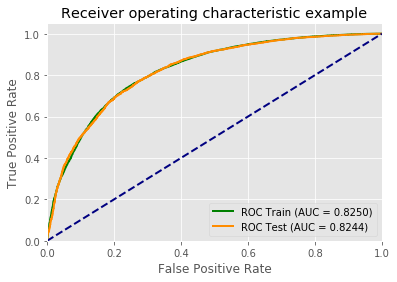

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


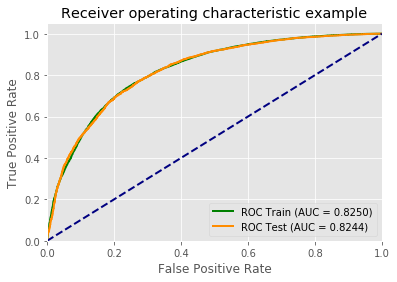

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


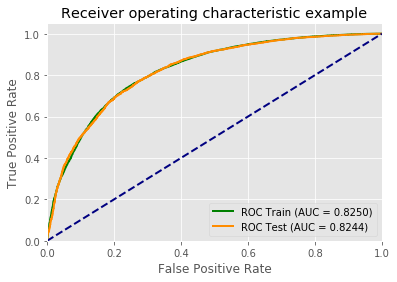

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


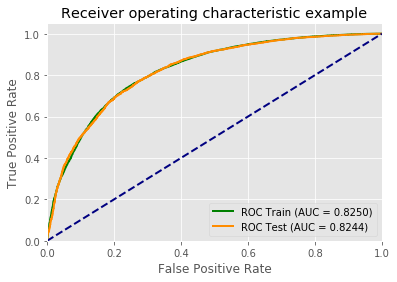

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


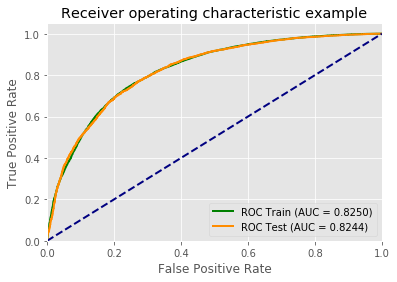

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


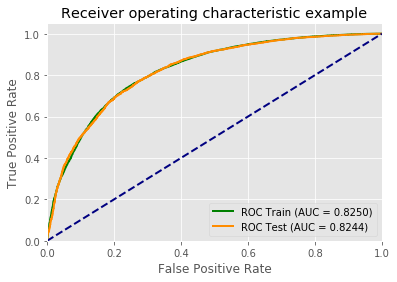

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


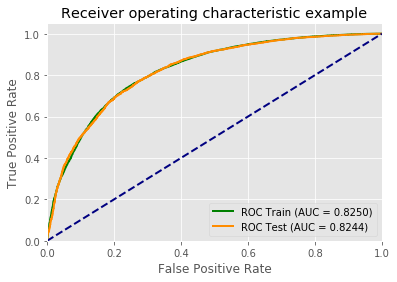

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


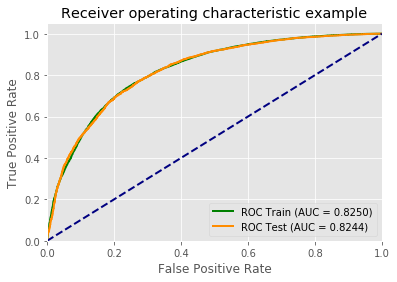

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


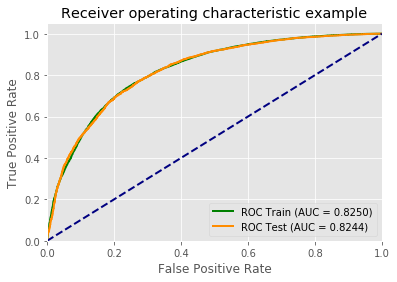

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


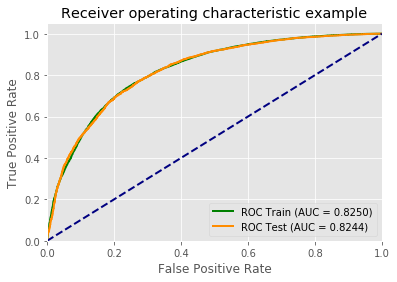

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


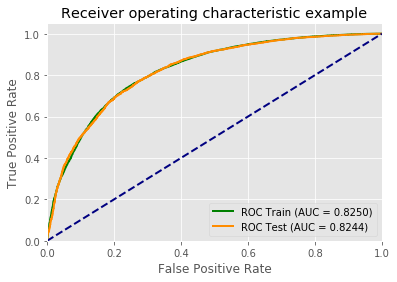

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


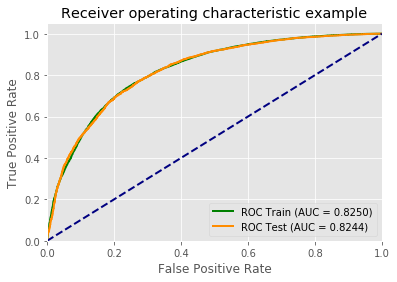

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


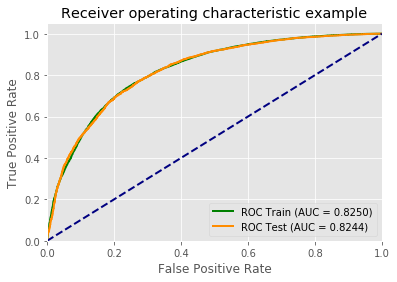

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


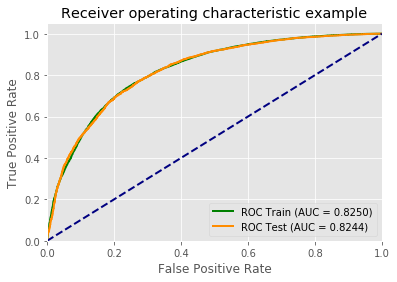

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


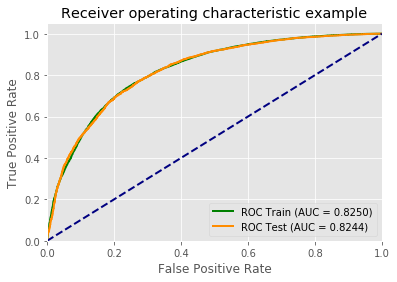

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


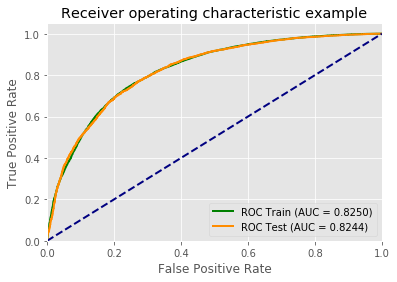

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


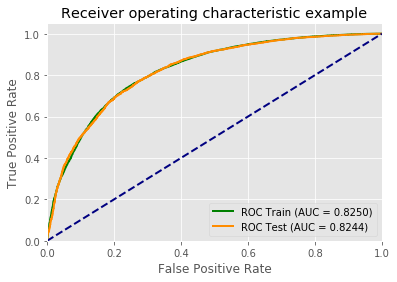

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


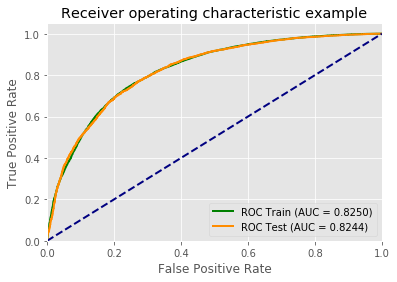

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


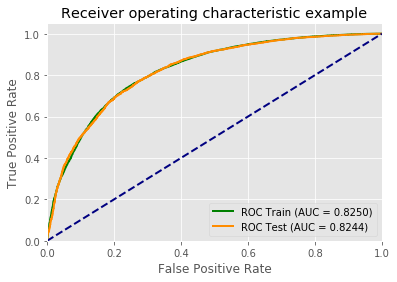

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


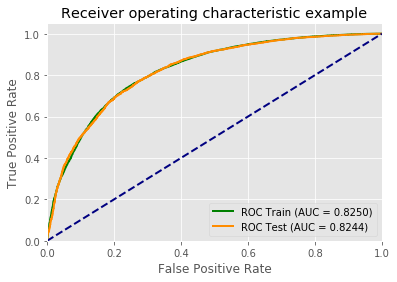

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


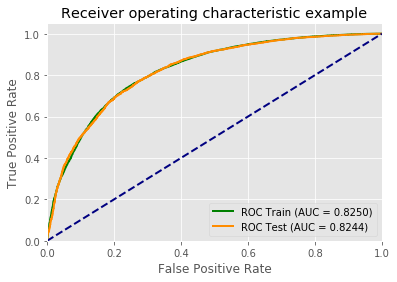

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


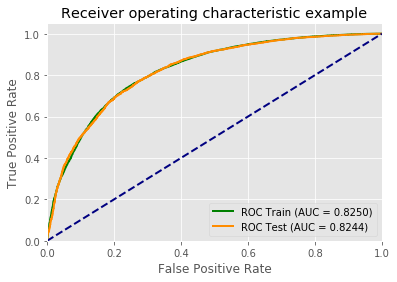

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


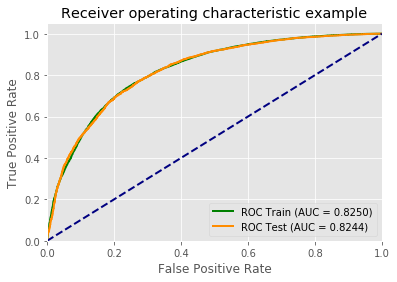

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


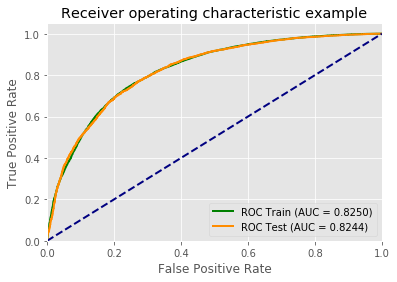

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


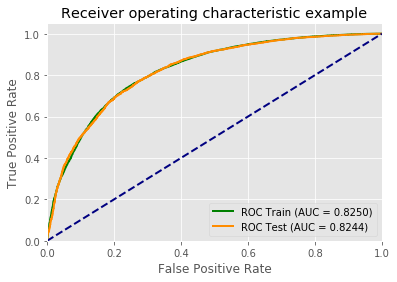

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


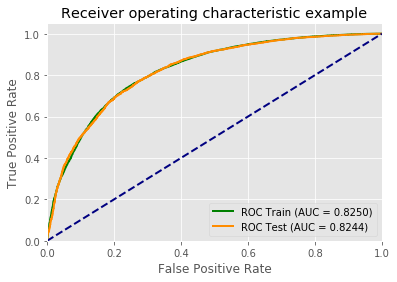

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


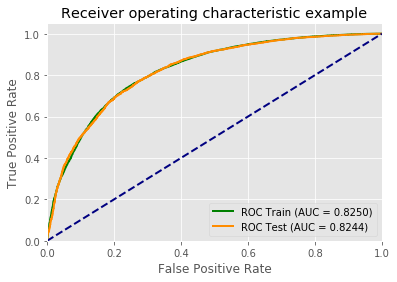

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


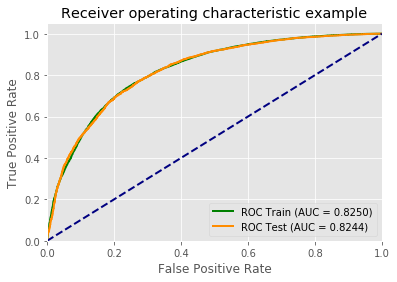

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


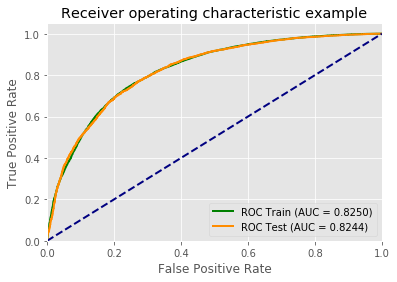

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


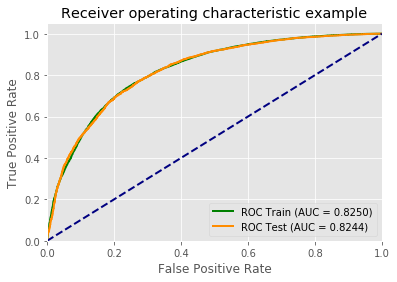

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


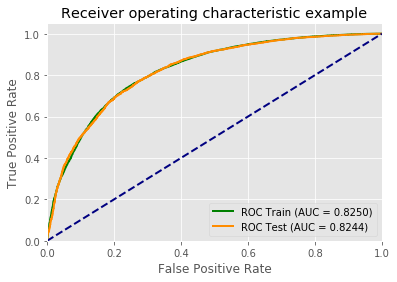

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


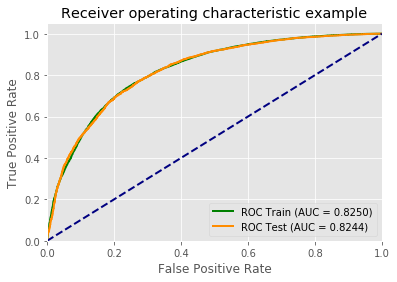

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


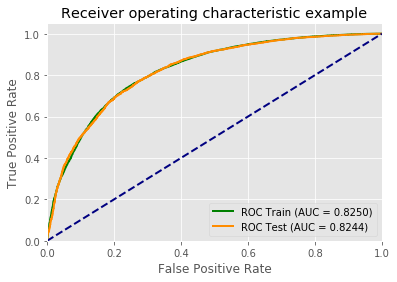

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


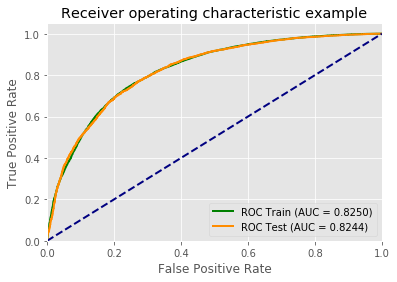

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


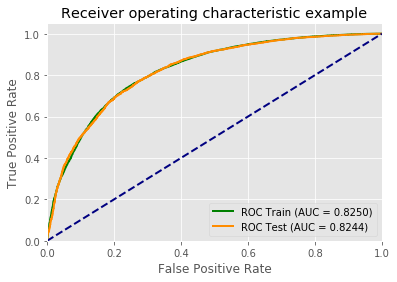

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


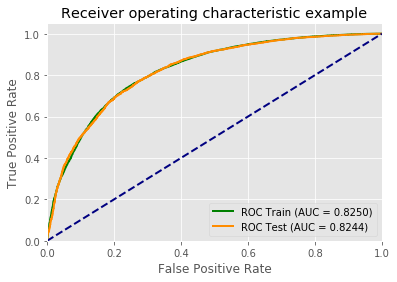

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


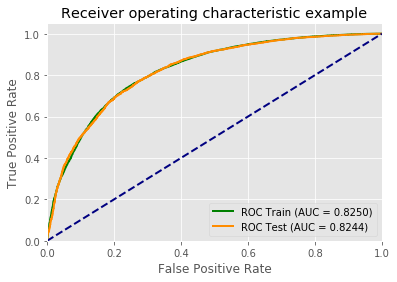

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


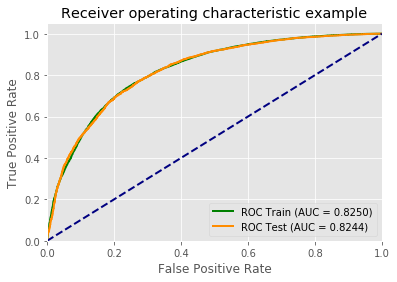

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


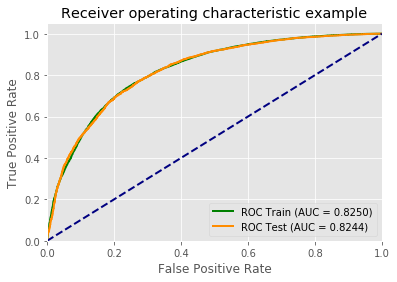

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


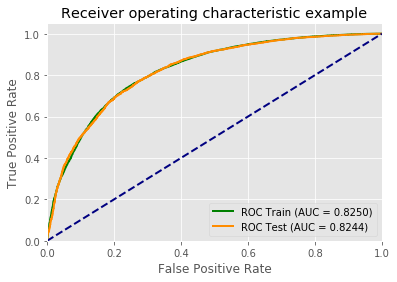

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


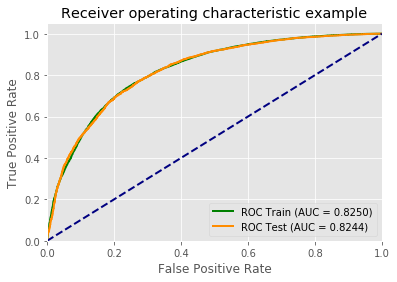

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


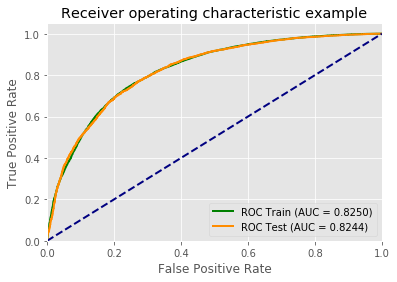

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


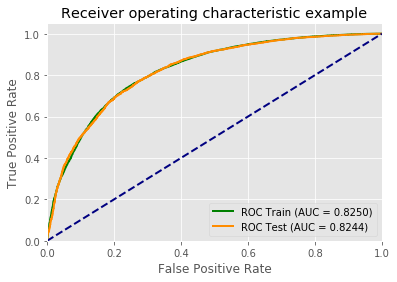

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


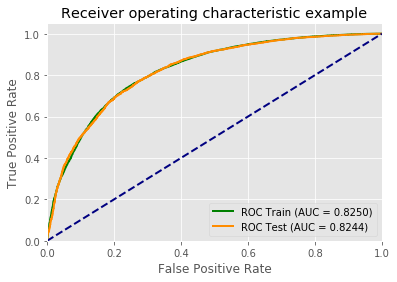

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


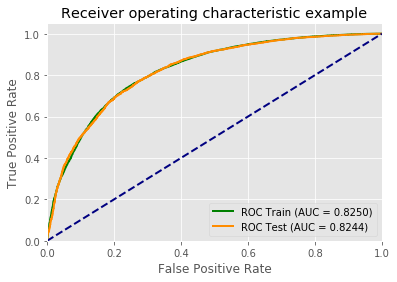

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


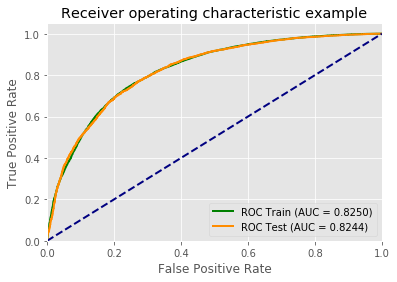

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


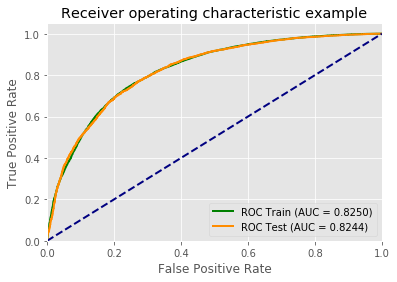

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


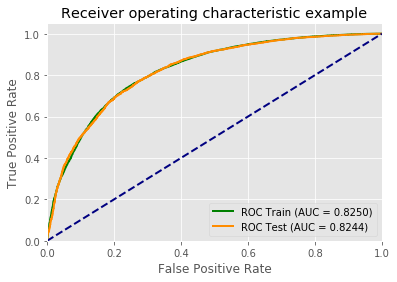

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


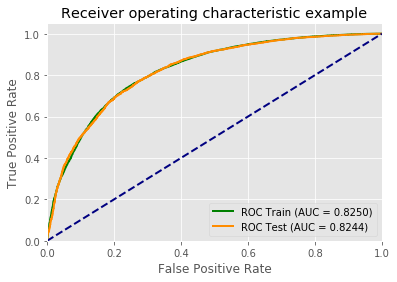

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


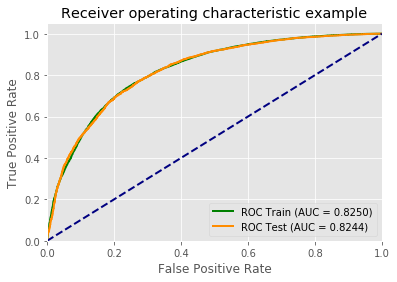

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


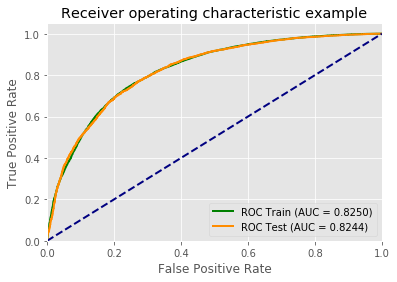

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


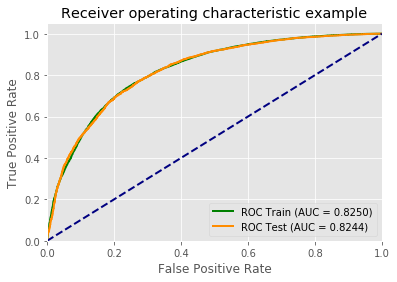

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


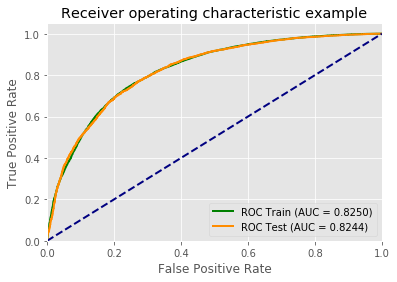

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


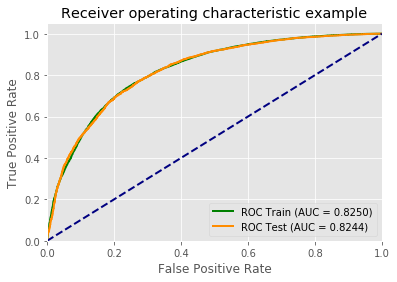

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


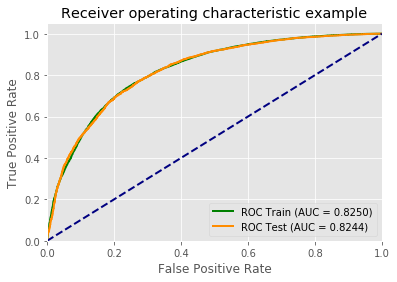

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


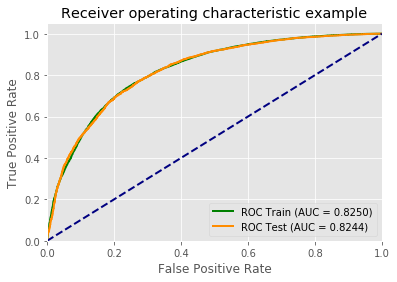

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


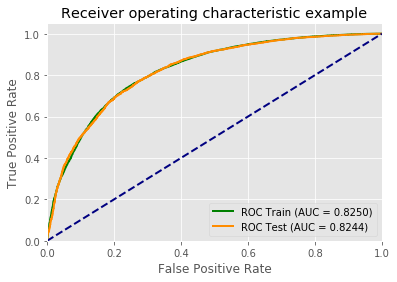

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


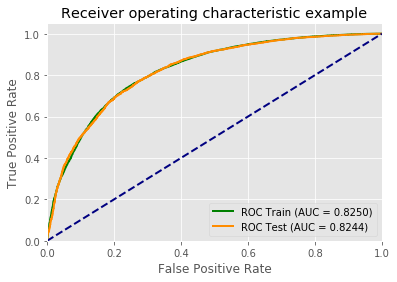

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


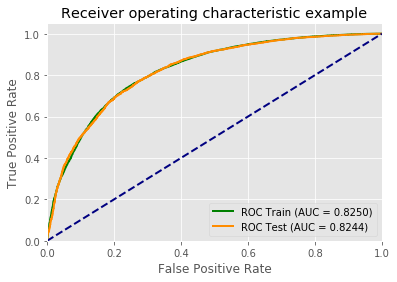

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


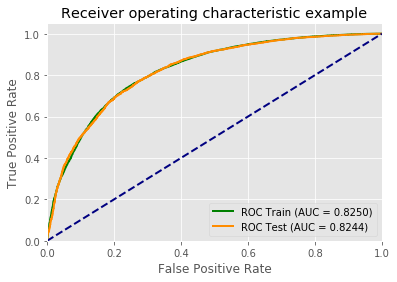

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


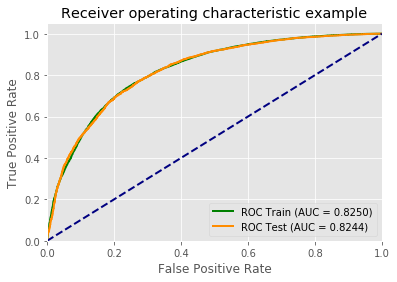

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


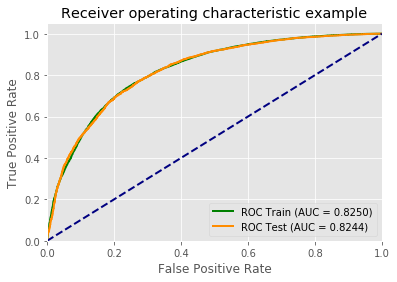

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


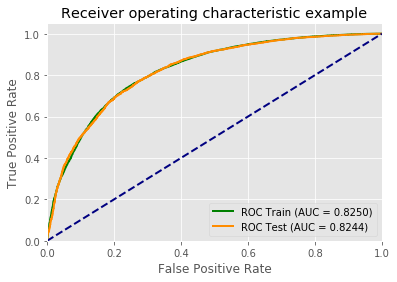

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


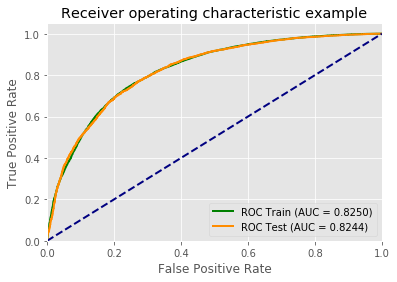

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


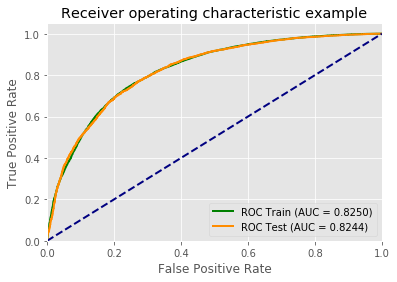

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


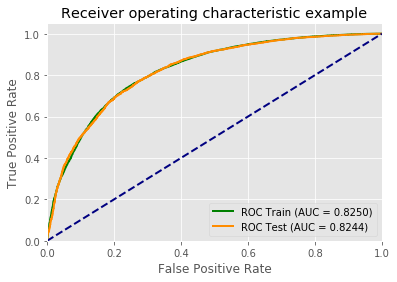

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


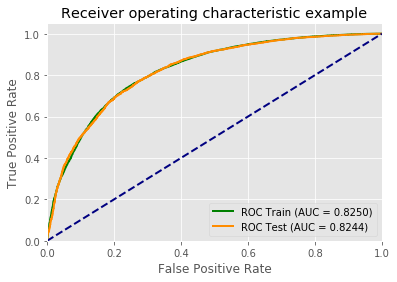

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


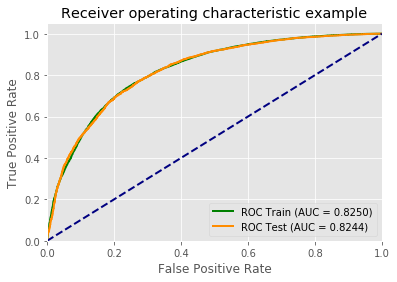

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


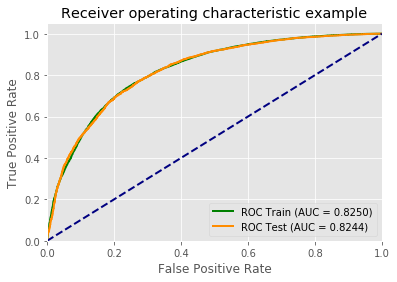

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


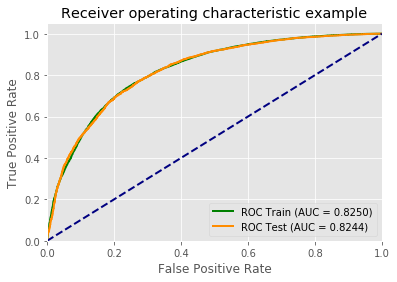

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


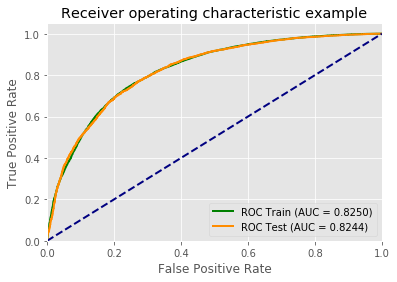

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


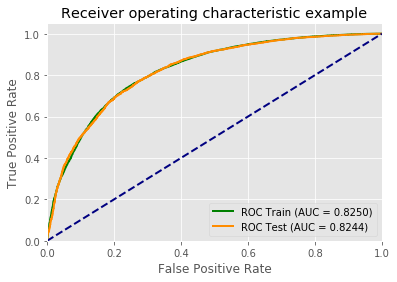

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


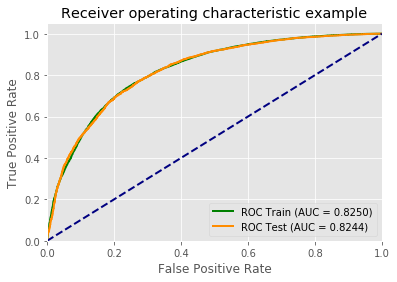

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


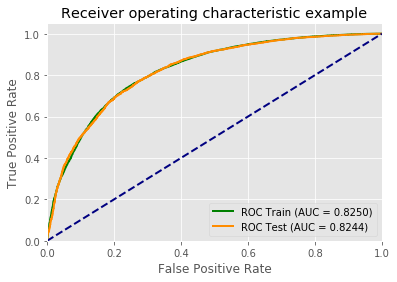

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


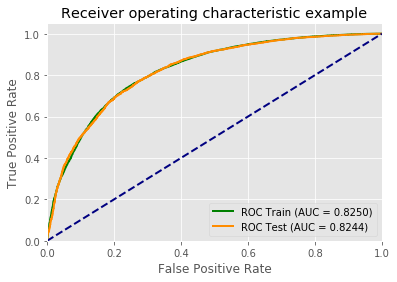

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


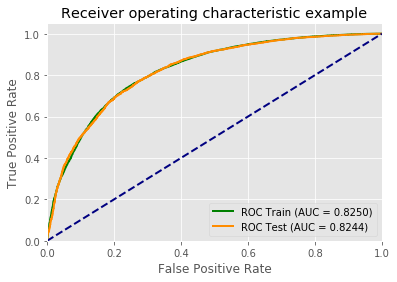

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


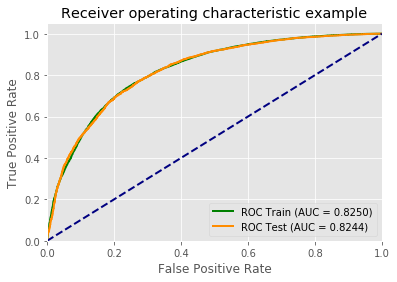

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


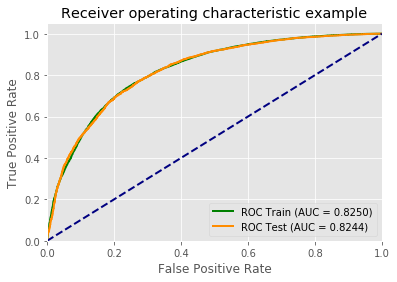

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


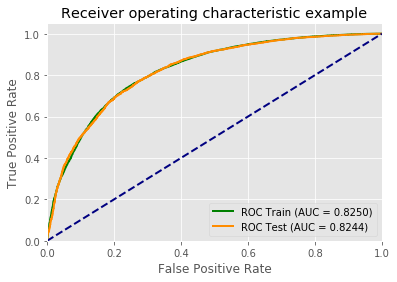

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


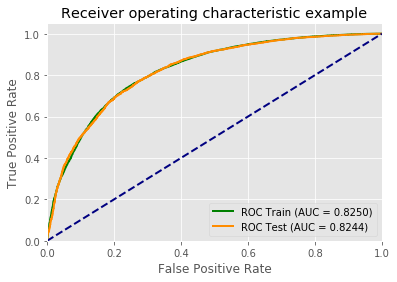

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


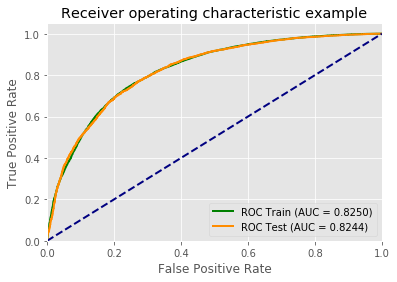

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


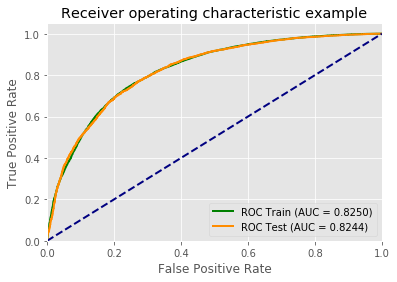

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


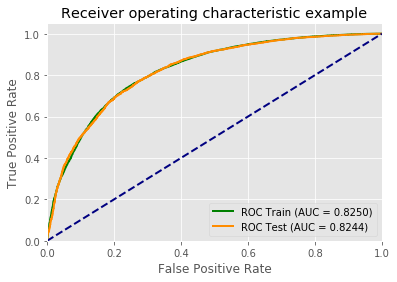

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


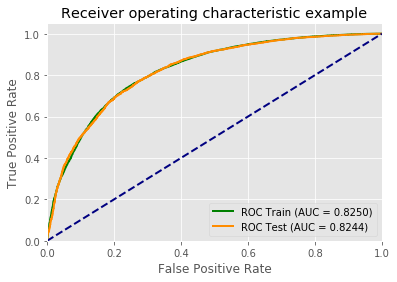

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


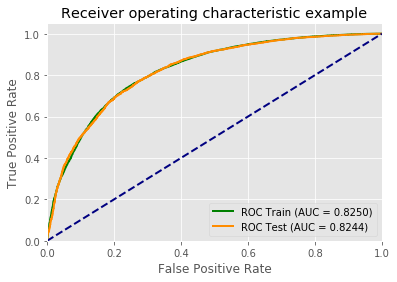

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


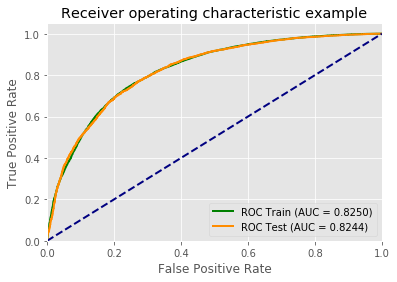

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


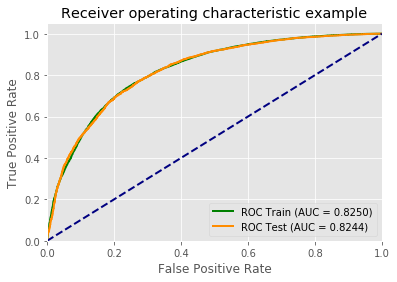

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


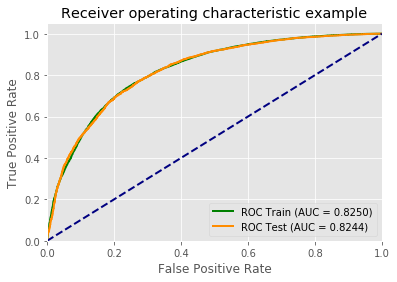

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


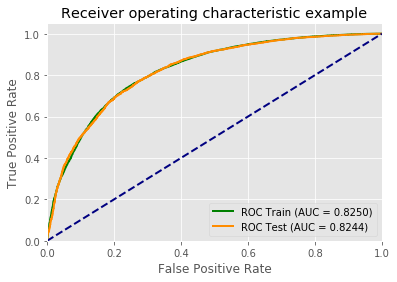

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


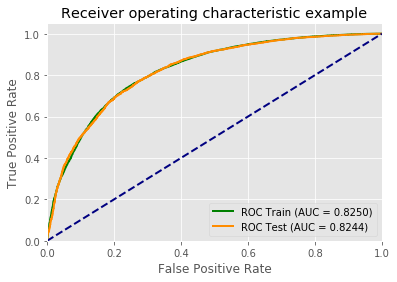

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


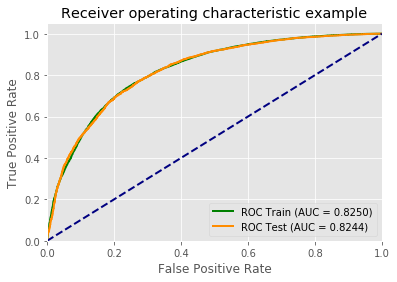

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


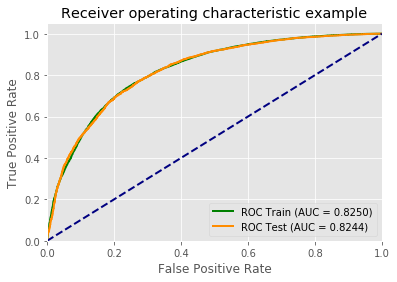

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


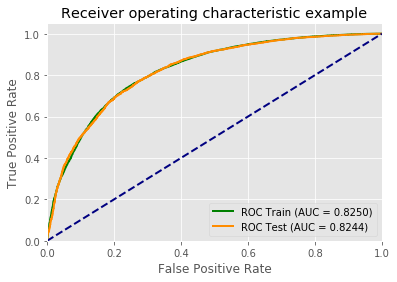

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


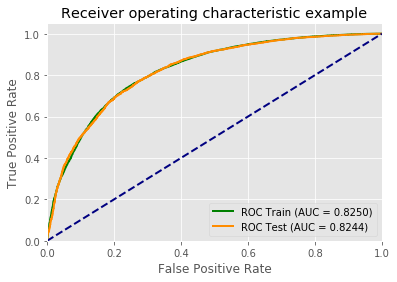

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


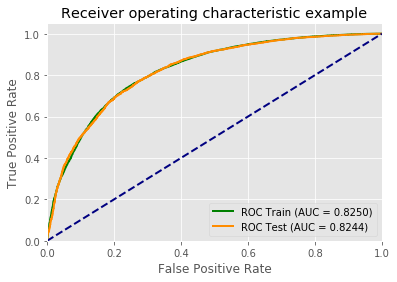

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


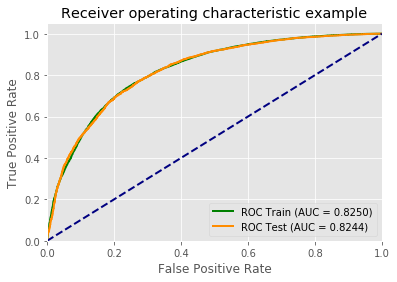

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


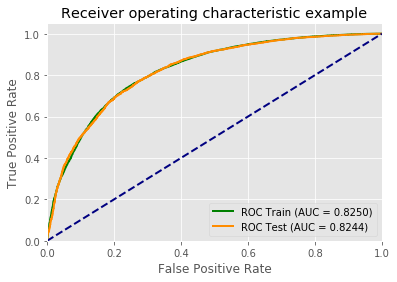

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


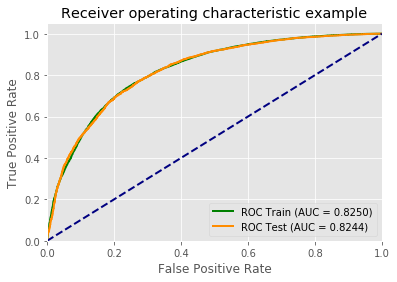

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


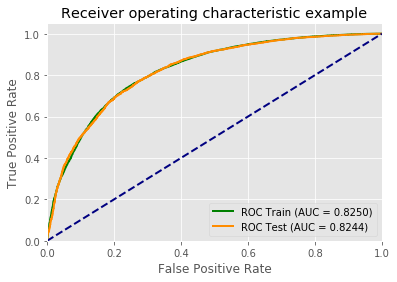

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


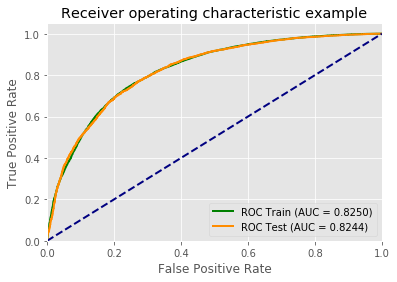

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


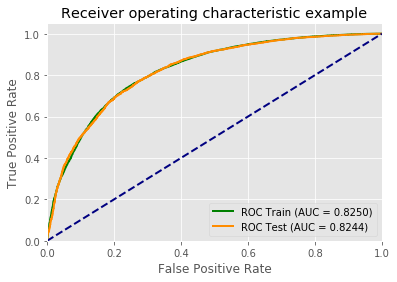

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


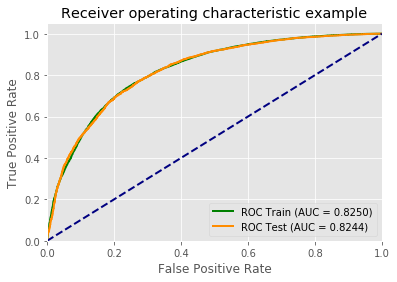

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


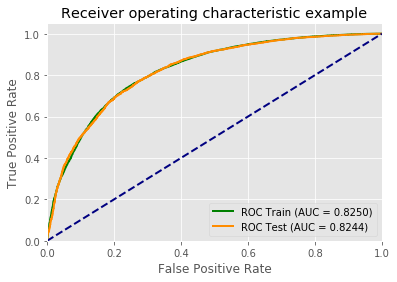

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


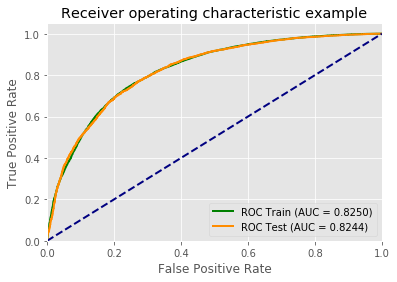

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


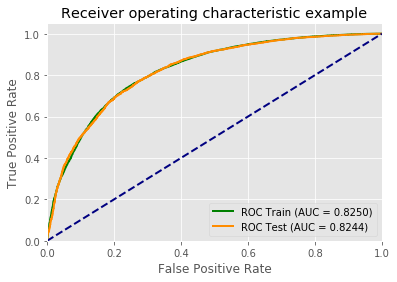

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


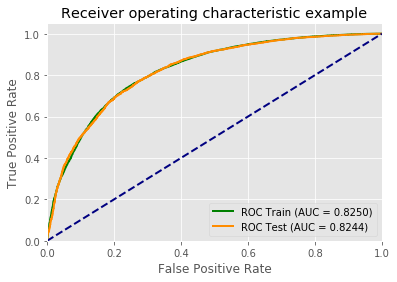

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


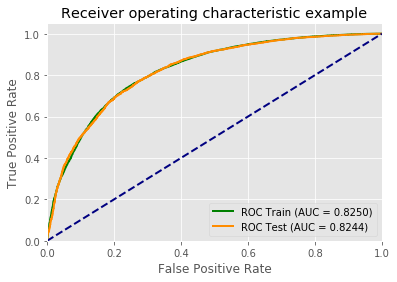

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


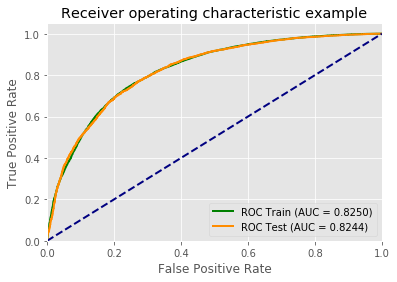

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


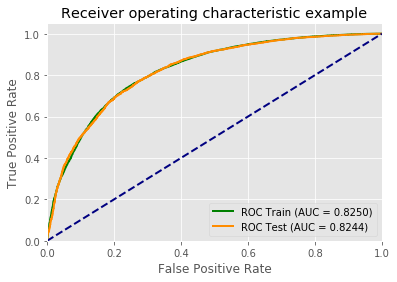

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


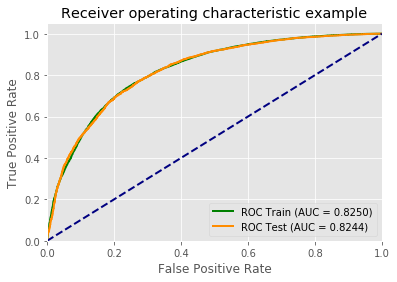

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


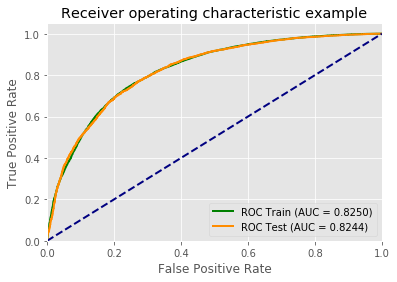

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


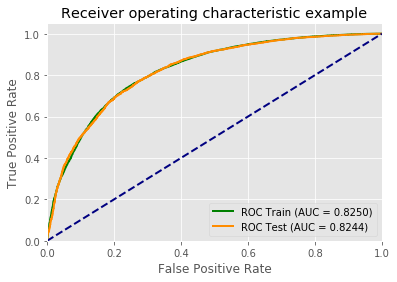

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


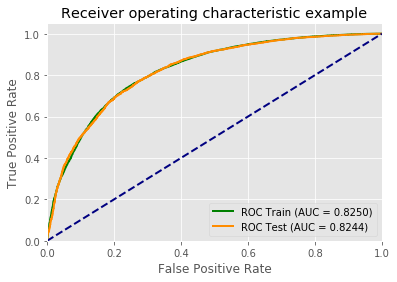

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


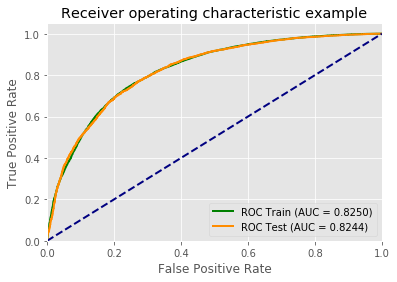

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


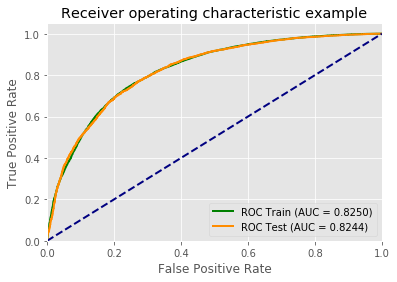

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


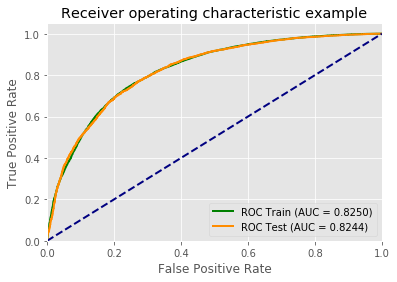

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


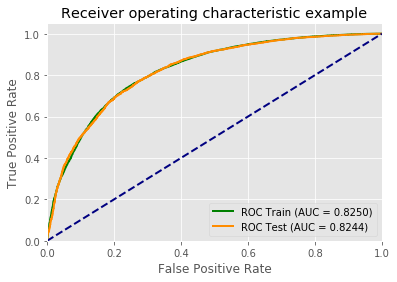

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


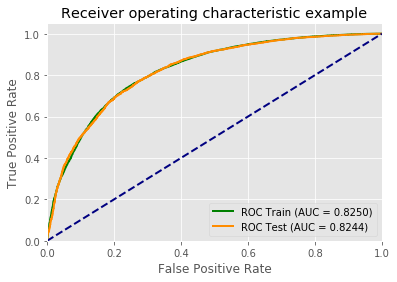

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


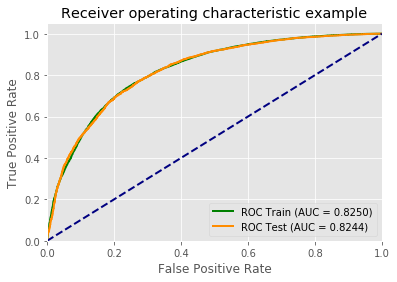

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


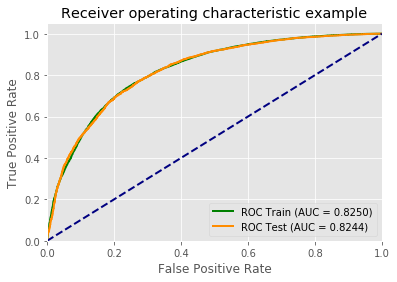

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


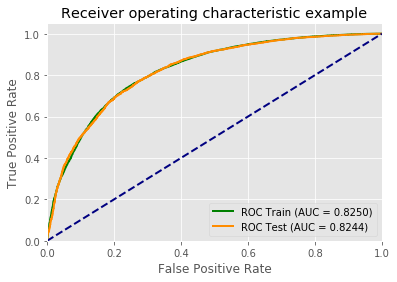

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


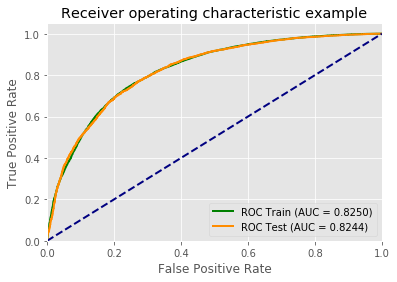

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


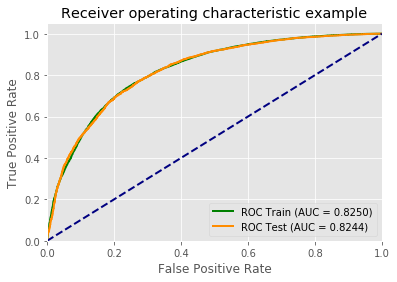

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


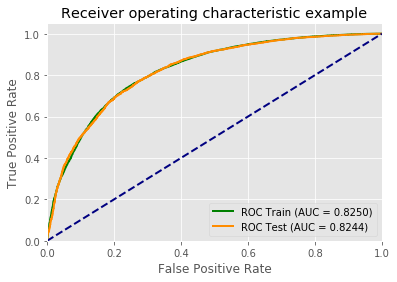

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


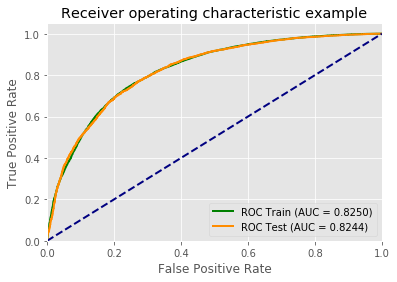

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


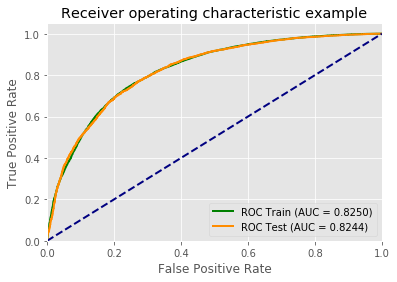

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


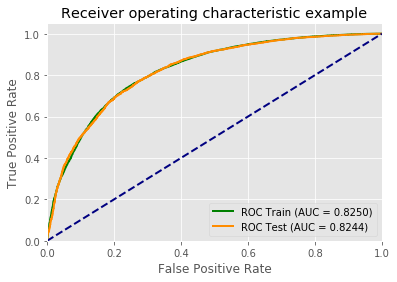

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


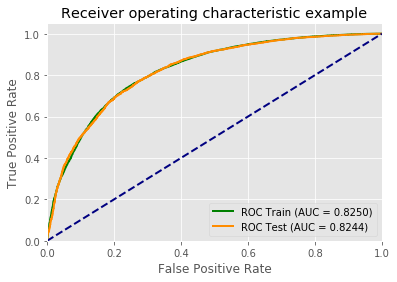

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


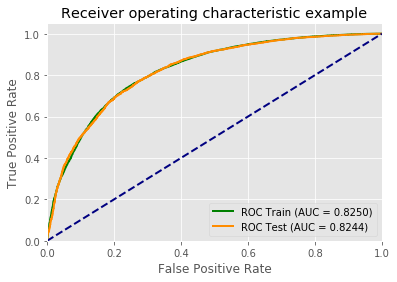

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


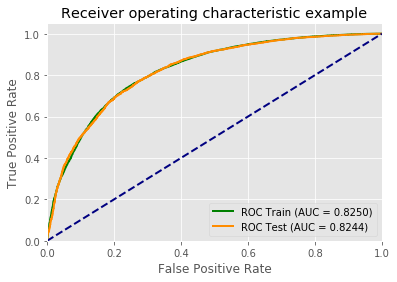

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


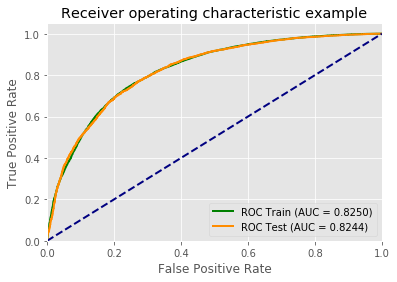

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


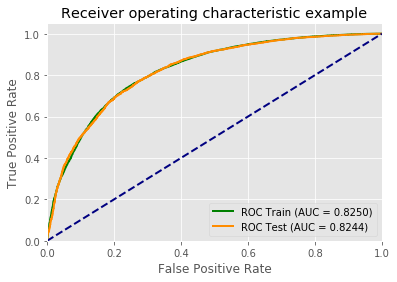

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


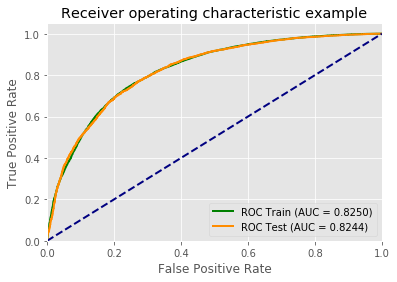

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


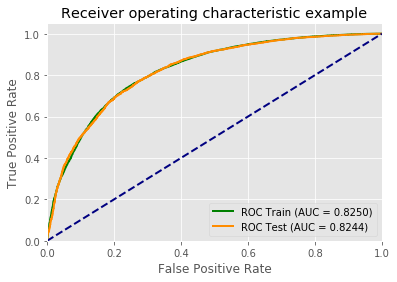

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


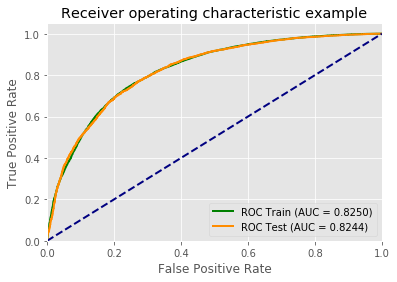

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


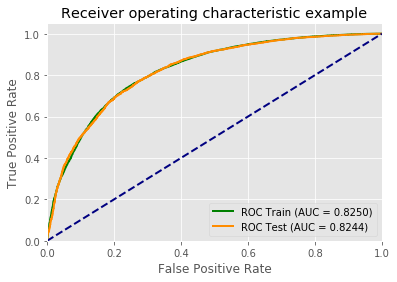

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


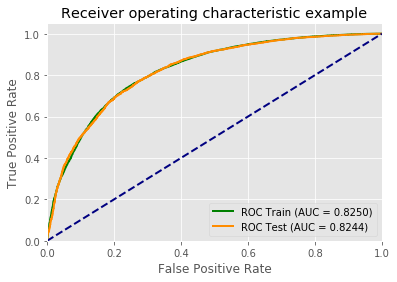

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


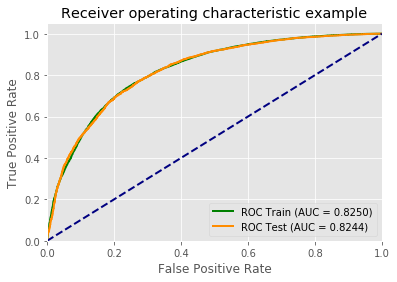

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


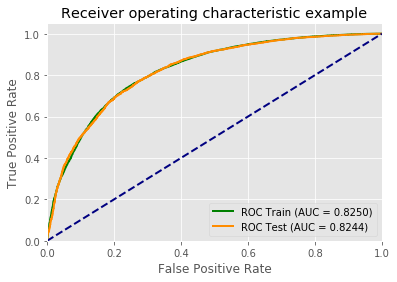

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


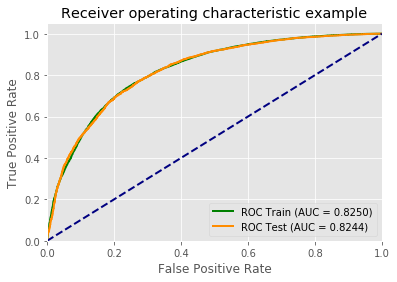

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


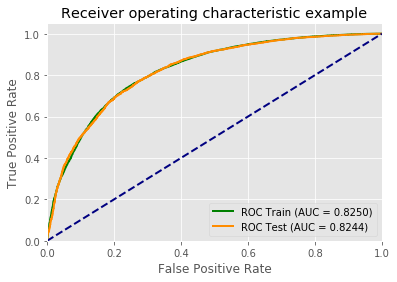

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


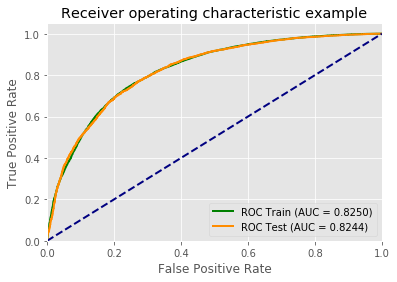

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


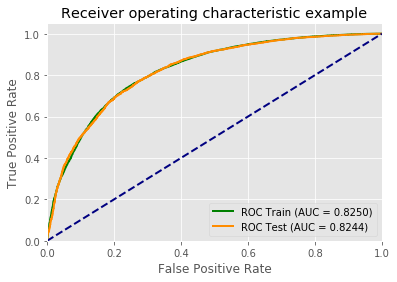

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


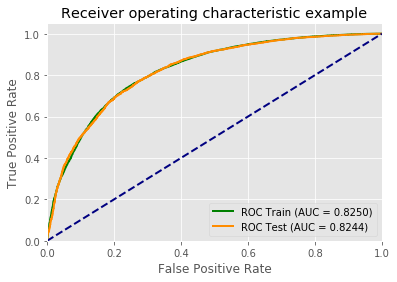

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


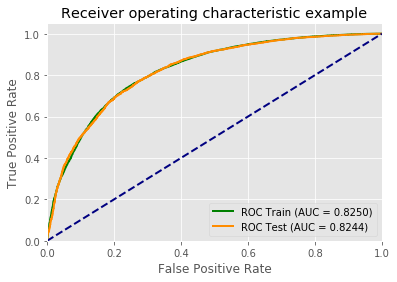

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


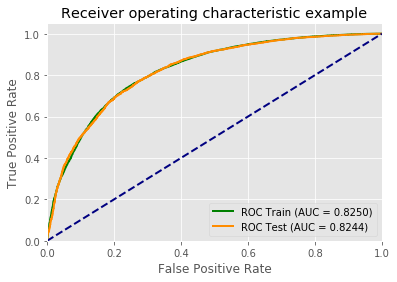

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


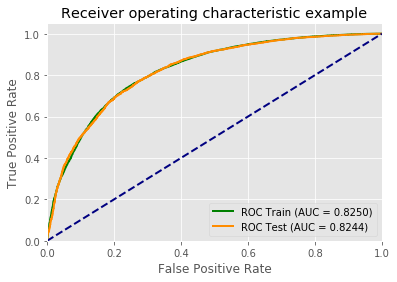

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


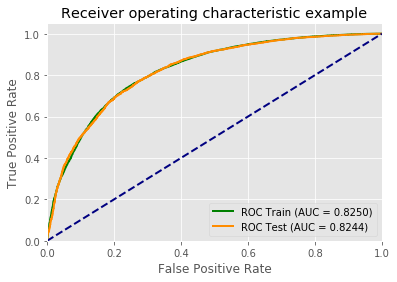

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


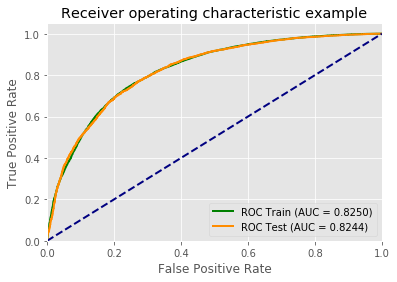

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


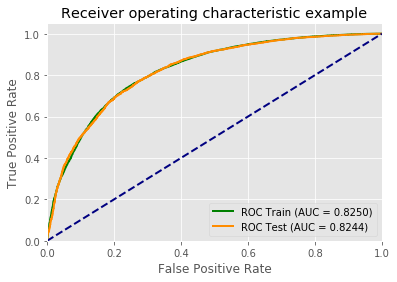

              train      test
metrics                      
AUC        0.825038  0.824378
Accuracy   0.765175  0.768900
Precision  0.783299  0.783453
Recall     0.861896  0.871061
f1-score   0.820720  0.824938


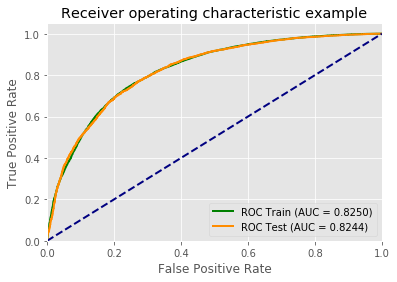

In [32]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

for i in range(200):
    # Choose some parameter combinations to try
    parameters = {
        'solver':'adam', 
        'activation':'relu',
        'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
        'hidden_layer_sizes':(35,35), 
        'learning_rate':'adaptive',
        'random_state':1
        }
    
    clf = MLPClassifier(**parameters)

    # Train test model
    train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.564270  0.565008
Accuracy   0.666275  0.668800
Precision  0.656120  0.657824
Recall     0.976829  0.979843
f1-score   0.784981  0.787174


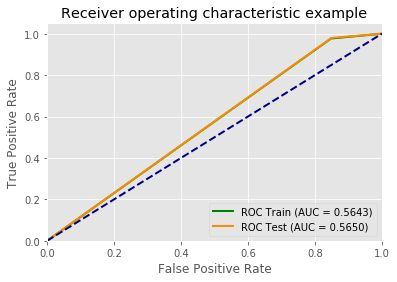

In [23]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2001).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.621702  0.597289
Accuracy   0.646750  0.641000
Precision  0.639444  0.636420
Recall     0.994067  0.992961
f1-score   0.778263  0.775681


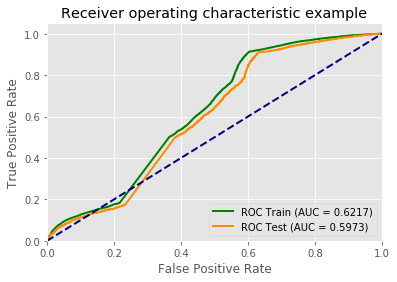

              train      test
metrics                      
AUC        0.621671  0.597244
Accuracy   0.641575  0.637600
Precision  0.635763  0.633880
Recall     0.995711  0.994881
f1-score   0.776030  0.774374


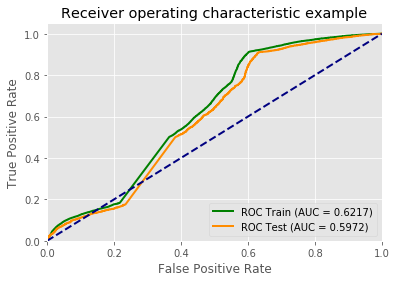

              train      test
metrics                      
AUC        0.621870  0.597442
Accuracy   0.665475  0.656400
Precision  0.654039  0.648989
Recall     0.984165  0.980803
f1-score   0.785839  0.781119


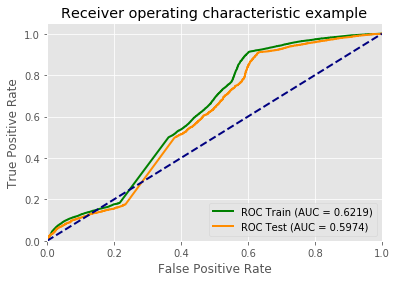

              train      test
metrics                      
AUC        0.621783  0.597327
Accuracy   0.655475  0.647100
Precision  0.645866  0.641300
Recall     0.990820  0.988162
f1-score   0.781991  0.777813


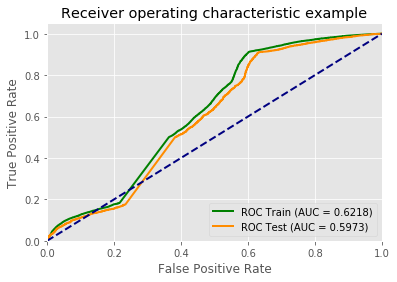

              train      test
metrics                      
AUC        0.622163  0.597613
Accuracy   0.671625  0.660600
Precision  0.659113  0.652699
Recall     0.980597  0.976804
f1-score   0.788340  0.782520


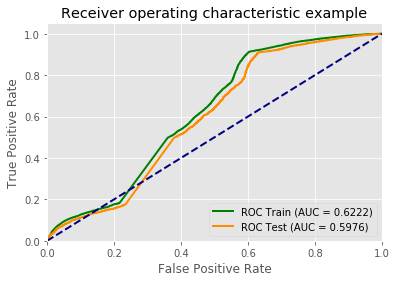

              train      test
metrics                      
AUC        0.622273  0.597856
Accuracy   0.642400  0.638100
Precision  0.636350  0.634231
Recall     0.995430  0.994721
f1-score   0.776381  0.774587


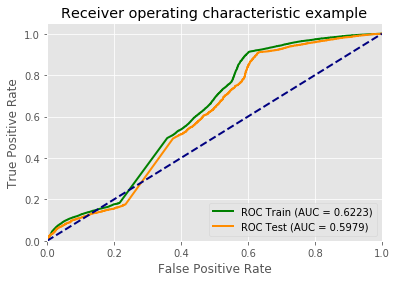

              train      test
metrics                      
AUC        0.622136  0.597576
Accuracy   0.706100  0.691600
Precision  0.697245  0.687020
Recall     0.934496  0.930571
f1-score   0.798623  0.790461


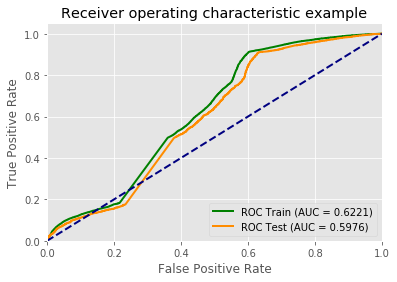

              train      test
metrics                      
AUC        0.621753  0.597344
Accuracy   0.692975  0.677200
Precision  0.679204  0.669470
Recall     0.962077  0.955207
f1-score   0.796264  0.787212


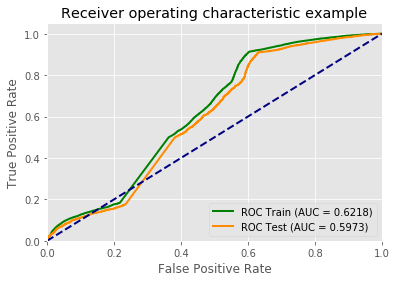

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

for i in range(200):
    # Choose some parameter combinations to try
    parameters = {
        'probability':True, # get simulated probability
        'max_iter':2000+i
        }
    clf = SVC(**parameters)    
    print("2000+i",2000+i)

    # Train test model
    train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.894296  0.857037
Accuracy   0.816000  0.788400
Precision  0.825781  0.803019
Recall     0.893446  0.876500
f1-score   0.858282  0.838152


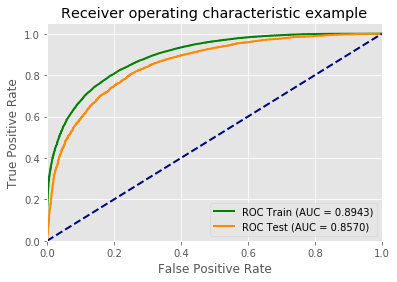

In [19]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [20]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression()

# Choose some parameter combinations to try
param_grid = {'C': [1,2], 
              'penalty':['l1','l2']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.760681  0.764024
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


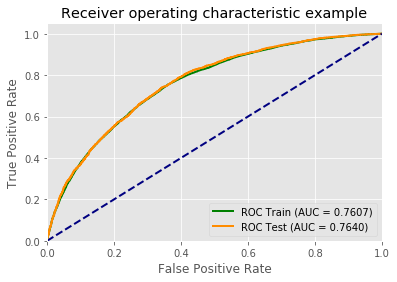

In [21]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [22]:
# Single Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# Choose some parameter combinations to try
param_grid = {'max_depth': [20,30,40], 
              'min_samples_leaf':[10,15,20]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              train      test
metrics                      
AUC        0.887446  0.827393
Accuracy   0.807950  0.764200
Precision  0.828807  0.793723
Recall     0.872199  0.841465
f1-score   0.849949  0.816897


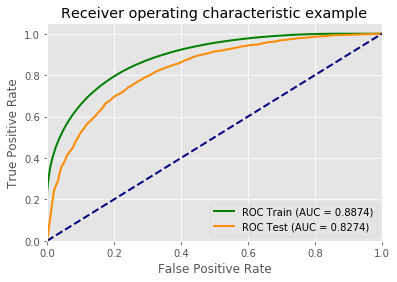

In [23]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [29]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
param_grid = {
    #'weights':'distance',
    'n_neighbors':[10,20,30],
    'leaf_size':[10,20,30]
    }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

              train      test
metrics                      
AUC        0.872362  0.811584
Accuracy   0.792225  0.757000
Precision  0.838062  0.806612
Recall     0.826538  0.804031
f1-score   0.832260  0.805320


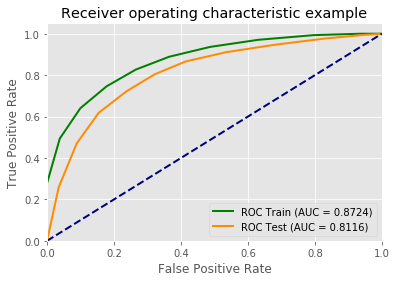

In [30]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)